In [1]:
%load_ext autoreload
%autoreload 2

from seqsketch.utils.config import Config
from pathlib import Path
import ipynbname
import os
import torch
import matplotlib.pyplot as plt

os.chdir(
    "/Users/joergensen/Documents/AA_DTU/9.semester(KAIST)/Diffusion/cs492dCourseProject/"
)


configurator = Config(config_file="./seqsketch/configs/unconditional.yaml")

datamodule = configurator.get_dataloader()
datamodule.num_workers = 0
dataloader = datamodule.train_dataloader()
model = configurator.get_model()

# load batch
X, C = model.prepare_batch(next(iter(dataloader)))

TypeError: DDIMScheduler.__init__() got an unexpected keyword argument 'clip_samples'

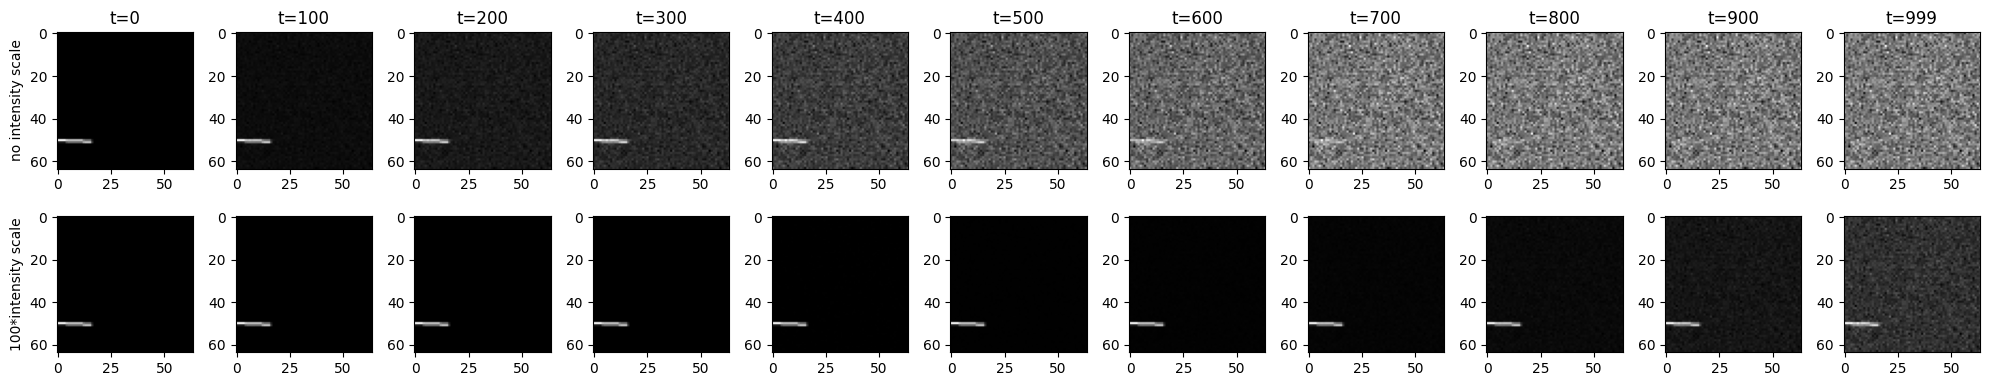

In [7]:
x0 = X[None, 0]  # select first sequence in batch and maintain batch dimension
x0_scaled = x0 * 100
x0_combined = torch.cat([x0, x0_scaled], dim=0)
eps = torch.randn_like(x0)

fig, ax = plt.subplots(2, 11, figsize=(20, 4))
timesteps = torch.tensor(
    model.scheduler.timesteps.tolist()[::-100] + [model.scheduler.timesteps[0]]
)

for i, t in enumerate(timesteps):
    xt = model.scheduler.add_noise(x0_combined, eps, t) if t > 0 else x0_combined
    for j in range(2):
        ax[j, i].imshow(xt[j].squeeze().detach().cpu().numpy(), cmap="gray")
        # ax[j, i].axis("off")
    ax[0, i].set_title(f"t={t}")
ax[0, 0].set_ylabel("no intensity scale")
ax[1, 0].set_ylabel("100*intensity scale")
plt.tight_layout()

In [9]:
model.scheduler.config

FrozenDict([('_map',
             OrderedDict([('num_train_timesteps', 1000),
                          ('beta_start', 0.0001),
                          ('beta_end', 0.02),
                          ('beta_schedule', 'squaredcos_cap_v2'),
                          ('clip_sample', False)])),
            ('_dynamic', True),
            ('_prevent_method_masking', False),
            ('num_train_timesteps', 1000),
            ('beta_start', 0.0001),
            ('beta_end', 0.02),
            ('beta_schedule', 'linear'),
            ('trained_betas', None),
            ('clip_sample', True),
            ('set_alpha_to_one', True),
            ('steps_offset', 0),
            ('prediction_type', 'epsilon'),
            ('thresholding', False),
            ('dynamic_thresholding_ratio', 0.995),
            ('clip_sample_range', 1.0),
            ('sample_max_value', 1.0),
            ('timestep_spacing', 'leading'),
            ('rescale_betas_zero_snr', False),
            ('_use_default_